Accuracy: 0.90


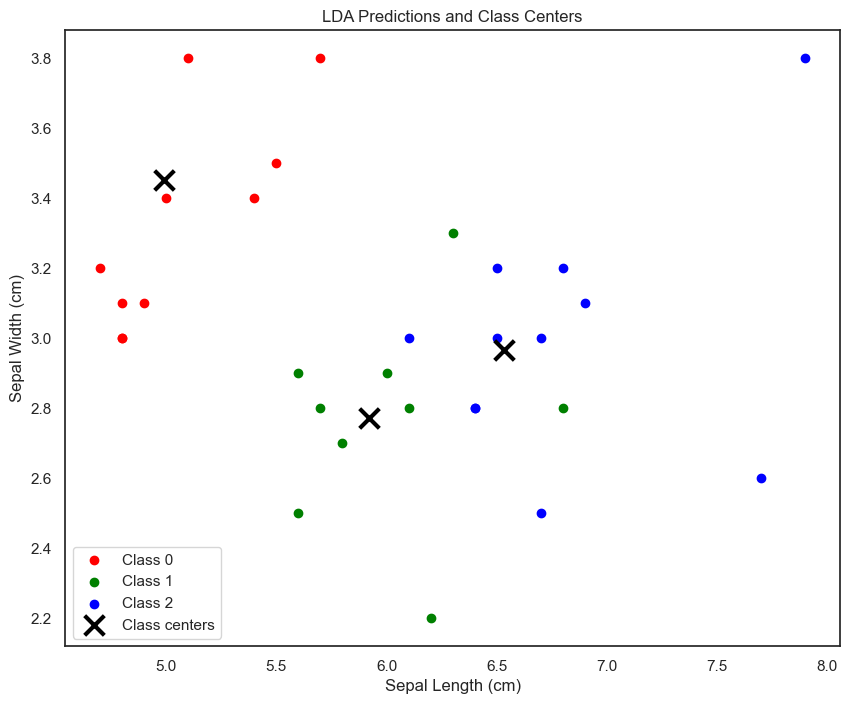

C:\Users\adeli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\adeli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\adeli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\adeli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

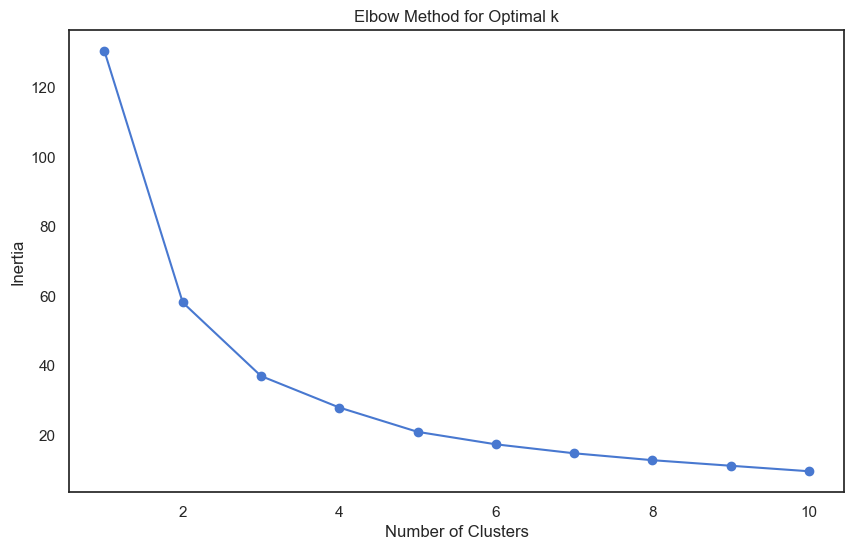

C:\Users\adeli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\adeli\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


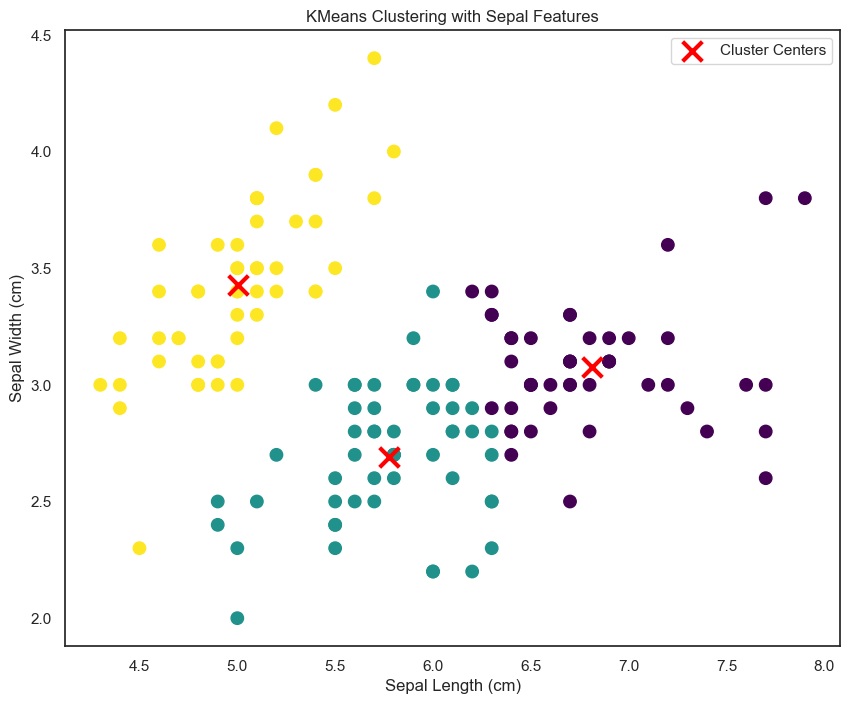

In [15]:

# Импорт библиотек
import matplotlib.pyplot as plt  
from sklearn.datasets import load_iris  
from sklearn.model_selection import train_test_split 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.cluster import KMeans  
from sklearn.metrics import accuracy_score  

# Загрузка датасета Iris
iris = load_iris()
X = iris.data[:, :2]  # Используем только признаки sepal_length и sepal_width
y = iris.target

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Предсказания для тестовой выборки
y_pred = lda.predict(X_test)

# Вычисление точности
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Визуализация предсказаний LDA и центров классов
plt.figure(figsize=(10, 8))
for i, c in zip(range(3), ['red', 'green', 'blue']):
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], c=c, label=f'Class {i}')
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='black', marker='x', s=200, linewidths=3, label='Class centers')
plt.title('LDA Predictions and Class Centers')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

# Подбор оптимального числа кластеров для KMeans
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Визуализация метода "локтя"
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# KMeans кластеризация с оптимальным числом кластеров
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# Визуализация кластеризации KMeans
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=80)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, linewidths=3,
            label='Cluster Centers')
plt.title('KMeans Clustering with Sepal Features')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()
